In [1]:
# importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
#data frame from dictionary 
data={"temperature":[0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360],
     "pressure":[0.0004,0.0012,0.006,0.03,0.09,0.27,0.75,1.85,4.2,8.8,17.3,32.1,57,96,157,247,376,558,806]
     }
data = pd.DataFrame(data)


In [3]:
data.head(2)

,temperature,pressure
0,0,0.0004
1,20,0.0012


In [4]:
#extracting a dependent(target)  and independent data 
x =data.iloc[:,:1].values
y=data.iloc[:,-1].values


In [5]:
x_train=x
y_train=y

<function matplotlib.pyplot.show(close=None, block=None)>

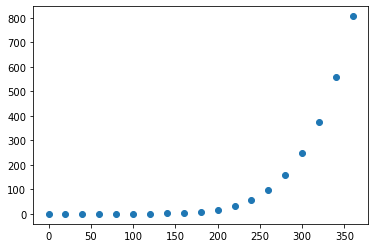

In [6]:
# visualize how our data  trend so that we can see to model tu use
plt.scatter(x_train,y_train)
plt.show

### 1.Using Linear regression 

In [7]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
Model=lr.fit(x_train,y_train)

In [8]:
Model

LinearRegression()

In [9]:
Model.coef_, Model.intercept_

(array([1.51241972]), -147.8988336842105)

In [11]:
# prediction 
y_pred_train =Model.predict(x_train)
y_pred_train

array([-147.89883368, -117.6504393 ,  -87.40204491,  -57.15365053,
        -26.90525614,    3.34313825,   33.59153263,   63.83992702,
         94.0883214 ,  124.33671579,  154.58511018,  184.83350456,
        215.08189895,  245.33029333,  275.57868772,  305.82708211,
        336.07547649,  366.32387088,  396.57226526])

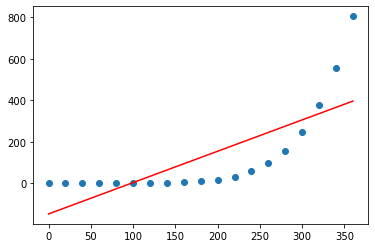

In [12]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred_train, color='r')

### 2.Using Support vector Regression 

In [13]:
# We need to reshape our data from 1D to 2D 
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

In [14]:
x_train.shape, y_train.shape

((19, 1), (19, 1))

In [16]:
#standarization 
#standardized dataset will have a mean of 0 and standard deviation of 1
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x= sc_x.fit_transform(x_train)
y = sc_y.fit_transform(y_train)

In [17]:
# Train the SVR model on the whole dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y) 
y_pred_svr=regressor.predict(x_train)
y_pred_svr

C:\Users\CELINE\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([-0.49506279,  0.17583328,  0.17583328,  0.17583328,  0.17583328,
        0.17583328,  0.17583328,  0.17583328,  0.17583328,  0.17583328,
        0.17583328,  0.17583328,  0.17583328,  0.17583328,  0.17583328,
        0.17583328,  0.17583328,  0.17583328,  0.17583328])

In [18]:
#prediction 
y_pred_svr = regressor.predict(x_train)
y_pred_svr

array([-0.49506279,  0.17583328,  0.17583328,  0.17583328,  0.17583328,
        0.17583328,  0.17583328,  0.17583328,  0.17583328,  0.17583328,
        0.17583328,  0.17583328,  0.17583328,  0.17583328,  0.17583328,
        0.17583328,  0.17583328,  0.17583328,  0.17583328])

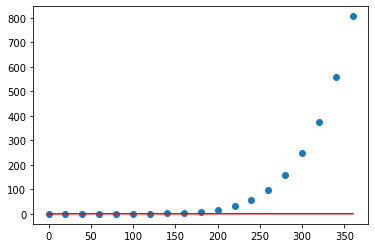

In [19]:
#visualize 
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred_svr,color="r")

### 3.Using Polynomial 


In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=4)
x_poly=poly.fit_transform(x_train)
x_poly

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 2.0000e+01, 4.0000e+02, 8.0000e+03],
       [1.0000e+00, 4.0000e+01, 1.6000e+03, 6.4000e+04],
       [1.0000e+00, 6.0000e+01, 3.6000e+03, 2.1600e+05],
       [1.0000e+00, 8.0000e+01, 6.4000e+03, 5.1200e+05],
       [1.0000e+00, 1.0000e+02, 1.0000e+04, 1.0000e+06],
       [1.0000e+00, 1.2000e+02, 1.4400e+04, 1.7280e+06],
       [1.0000e+00, 1.4000e+02, 1.9600e+04, 2.7440e+06],
       [1.0000e+00, 1.6000e+02, 2.5600e+04, 4.0960e+06],
       [1.0000e+00, 1.8000e+02, 3.2400e+04, 5.8320e+06],
       [1.0000e+00, 2.0000e+02, 4.0000e+04, 8.0000e+06],
       [1.0000e+00, 2.2000e+02, 4.8400e+04, 1.0648e+07],
       [1.0000e+00, 2.4000e+02, 5.7600e+04, 1.3824e+07],
       [1.0000e+00, 2.6000e+02, 6.7600e+04, 1.7576e+07],
       [1.0000e+00, 2.8000e+02, 7.8400e+04, 2.1952e+07],
       [1.0000e+00, 3.0000e+02, 9.0000e+04, 2.7000e+07],
       [1.0000e+00, 3.2000e+02, 1.0240e+05, 3.2768e+07],
       [1.0000e+00, 3.4000e+02,

In [32]:
Model_poly=LinearRegression()
Model_poly.fit(x_poly, y)

LinearRegression()

In [33]:
Model_poly.coef_, Model_poly.intercept_ 

(array([[ 0.00000000e+00,  9.53985062e-03, -1.02790452e-04,
          2.89608976e-07]]),
 array([-0.71894275]))

In [34]:
y_poly_pred= Model_poly.predict(x_poly)

In [39]:
#visualization 
#plt.scatter(x_train, y_train, color = 'red')
#plt.plot(x_train, y_poly_pred)
#plt.show()